# Objective: To predict the number of wins for a given team in baseball tournament.

In this task we need to predict the the number of wins for a given team playing in Major League Baseball on the  basis of other features from the past tournament like Runs, At Bats Hits, etc.

* The target feature is Number of Predicted wins (W)

#### Importing various libraries necessary for the task to complete.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
ball = pd.read_csv("./Downloads/baseball.csv")

In [3]:
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### Checking the dimension, description and pressence of null values in the dataset.

In [4]:
ball.shape

(30, 17)

In [5]:
ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

From the above we can conclude about the dataset this :
* dataset has 30 rows and 17 columns in it.
* From the description we get to know the mean, max value, min value, etc of each column present in the dataset.
* we also get to know that there is not a single null value present in the dataset.

#### EDA

1. R (Runs)

In [7]:
ball['R'].unique()

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

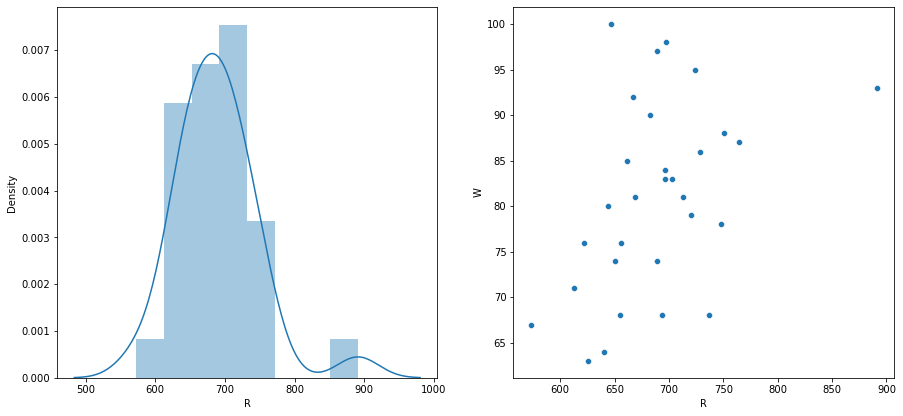

In [8]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['R'])
plt.xlabel('R')
plt.subplot(222)
sns.scatterplot(x= 'R', y= 'W', data= ball)
plt.xlabel('R')
plt.ylabel('W')
plt.show()

By looking at both the graphs of R we can conclude that the data is giving a hint of positive skewness with having highest density of data around 700 and the plot line is giving two peaks from the distplot and from the scatterplot we can conclude that data is showing positive correlation with target feature (W) with data is scattering much more while increasing.

2. AB (At Bats)

In [9]:
ball['AB'].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

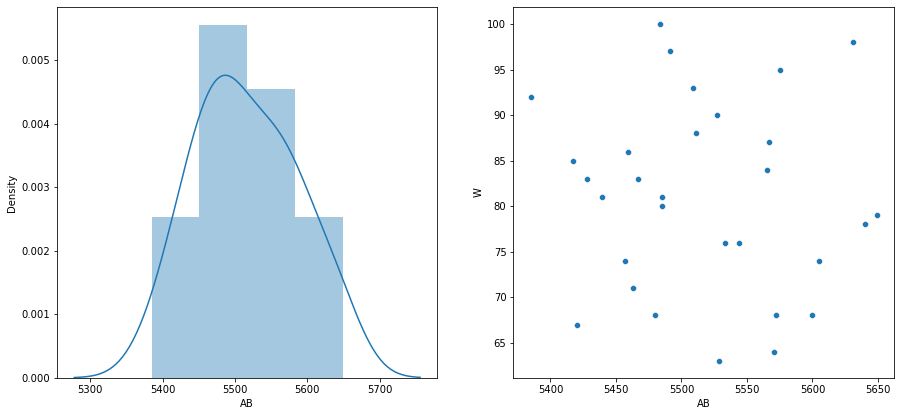

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['AB'])
plt.xlabel('AB')
plt.subplot(222)
sns.scatterplot(x= 'AB', y= 'W', data= ball)
plt.xlabel('AB')
plt.ylabel('W')
plt.show()

By looking at both the graphs of AB we can conclude that the data is giving slight hint of positive skewness with data having highest density between 5000 and 5000 from the distplot and from the scatterplot we can conclude that data is showing some positive correlation with target feature while data is scattered all over the place.

3. H (Hits)

In [11]:
ball['H'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

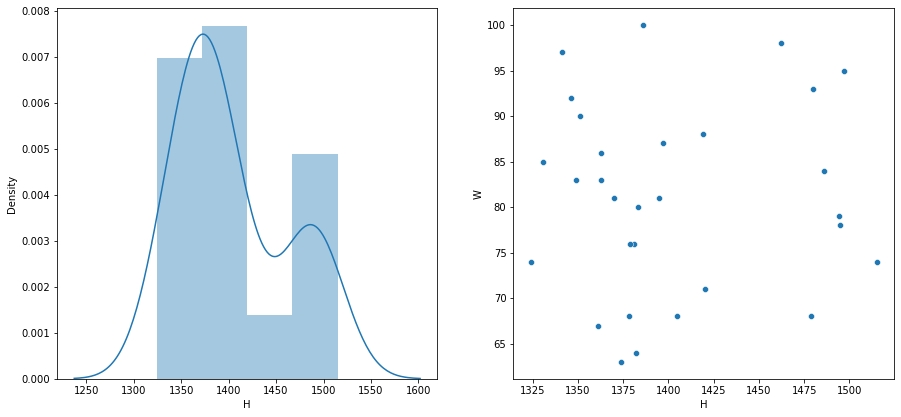

In [12]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['H'])
plt.xlabel('H')
plt.subplot(222)
sns.scatterplot(x= 'H', y= 'W', data= ball)
plt.xlabel('H')
plt.ylabel('W')
plt.show()

By looking at both the graphs of H we can conclude that the data is showing positive skewness with data having highest density at around 1400 and plotline is showing two peaks in the plot from the distplot and from the scatterplot we can conclude that the data is scattered all over the place while giving a slight hint of positive correlation with target variable.

4. 2B (Doubles)

In [13]:
ball['2B'].unique()

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

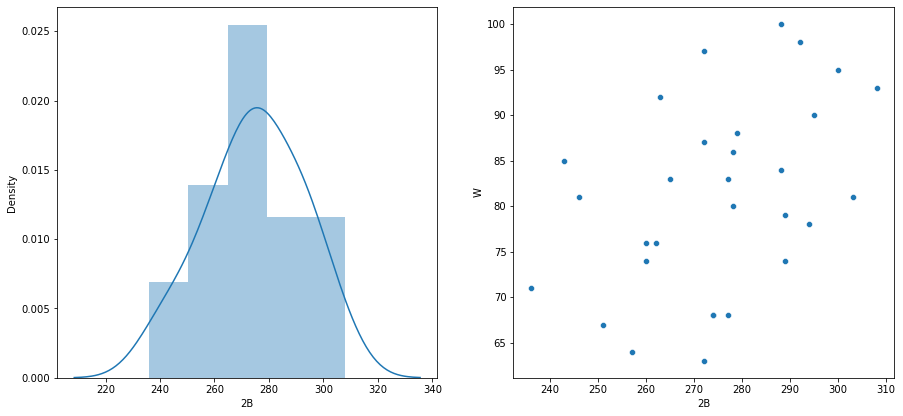

In [14]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['2B'])
plt.xlabel('2B')
plt.subplot(222)
sns.scatterplot(x= '2B', y= 'W', data= ball)
plt.xlabel('2B')
plt.ylabel('W')
plt.show()

By looking at both the graphs of 2B we can conclude that data is showing slight hint of negative skewness with data having highest density between 260 & 280 from the distplot and from the scatterplot we can conclude that data is showing positive correlation with target feature while being scattered all over the place when it is increasing.

5. 3B (Triples)

In [15]:
ball['3B'].unique()

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

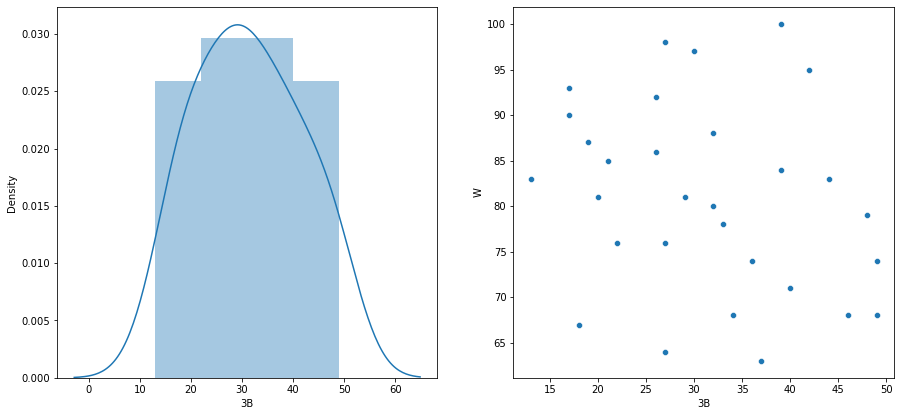

In [16]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['3B'])
plt.xlabel('3B')
plt.subplot(222)
sns.scatterplot(x= '3B', y= 'W', data= ball)
plt.xlabel('3B')
plt.ylabel('W')
plt.show()

By looking at both the graphs of 3B we can conclude that the data is showing a slight hint of positive skewness with data having highest density between 25 & 40 from the distplot and from the scatterplot we can conclude that data is showing somewhat negative correlation with target feature while being scattered.

6. HR (Home Runs)

In [17]:
ball['HR'].unique()

array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

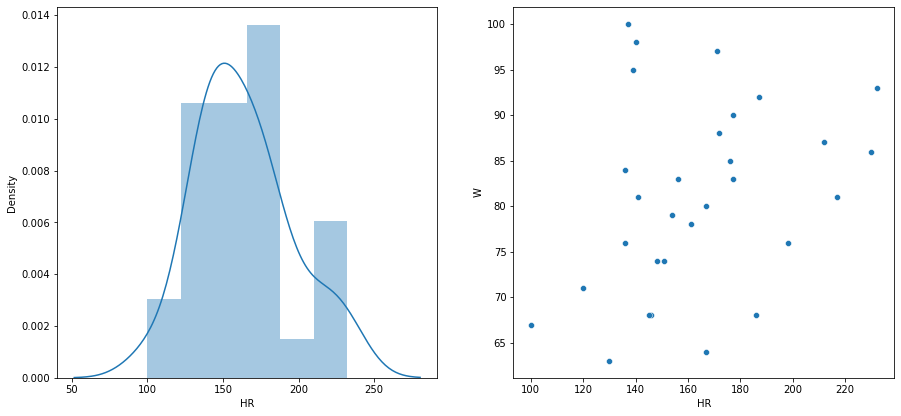

In [18]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['HR'])
plt.xlabel('HR')
plt.subplot(222)
sns.scatterplot(x= 'HR', y= 'W', data= ball)
plt.xlabel('HR')
plt.ylabel('W')
plt.show()

By looking at both the graphs of HR we can conclude that data is showing positive skewness with data having highest density around 175 or 180 from the distplot and from the scatterplot we can conclude that data is showing positive correlation with target feature while data is being scattered somewhat while increasing in value.

7. BB (Walks or Base on Balls)

In [19]:
ball['BB'].unique()

array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

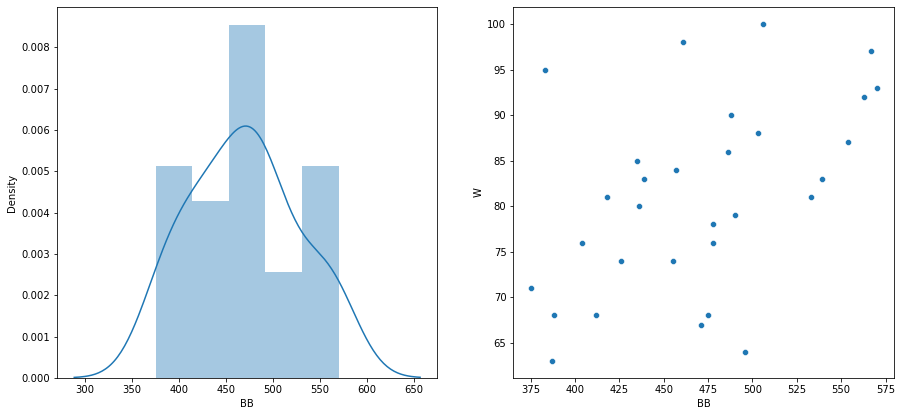

In [20]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['BB'])
plt.xlabel('BB')
plt.subplot(222)
sns.scatterplot(x= 'BB', y= 'W', data= ball)
plt.xlabel('BB')
plt.ylabel('W')
plt.show()

By looking at both the graphs of BB we can conclude that data is showing slight positive skewness with having highest density at around 465 or 475 from the distplot and from the scatterplot we can conclude that data is having positive correlation with target feature while data being somewhat scattered while increasing in value.

8. SO (Strikeouts)

In [21]:
ball['SO'].unique()

array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

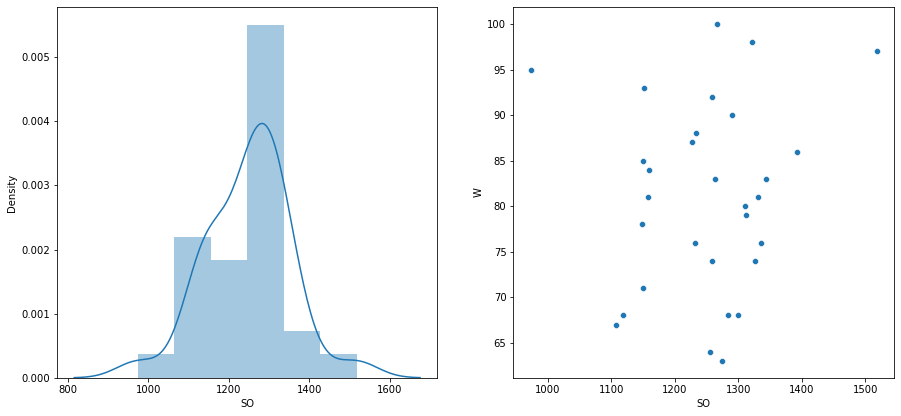

In [22]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['SO'])
plt.xlabel('SO')
plt.subplot(222)
sns.scatterplot(x= 'SO', y= 'W', data= ball)
plt.xlabel('SO')
plt.ylabel('W')
plt.show()

By looking at both the graphs of SO we can conclude that the data is showing slight hint of negative skewness with data having highest density at around 1300 from the distplot and from the scatterplot we can conclude that data is showing positive correlation with taget feature while not being scattered so much while increasing its value.

9. SB (Stolen Bases)

In [23]:
ball['SB'].unique()

array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

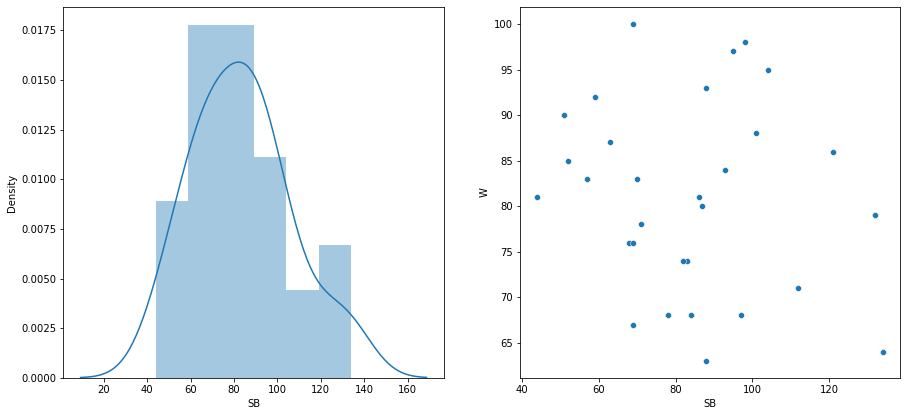

In [24]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['SB'])
plt.xlabel('SB')
plt.subplot(222)
sns.scatterplot(x= 'SB', y= 'W', data= ball)
plt.xlabel('SB')
plt.ylabel('W')
plt.show()

By looking at both the graphs of SB we can conclude that the data is showing slight hint of negative skewness with data having highest density between 60 & 85 from the distplot and from the scatterplot we can conclude that the data is showing somewhat negative correlation with target feature while data being scattered all over the place.

10. RA (Runs Allowed)

In [25]:
ball['RA'].unique()

array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

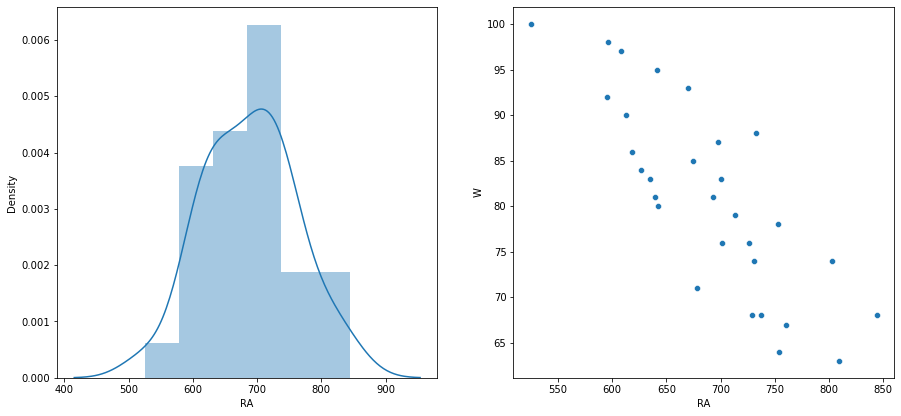

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['RA'])
plt.xlabel('RA')
plt.subplot(222)
sns.scatterplot(x= 'RA', y= 'W', data= ball)
plt.xlabel('RA')
plt.ylabel('W')
plt.show()

By looking at both the graphs of RA we can conclude that data is showing somewhat slight hint of positive skewness with data having highest density at around 700 from the distplot and from the scatteredplot we can conclude that data is having negative correlation with target feature while not being scattered so much all over the place.

11. ER (Earned Runs)

In [27]:
ball['ER'].unique()

array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

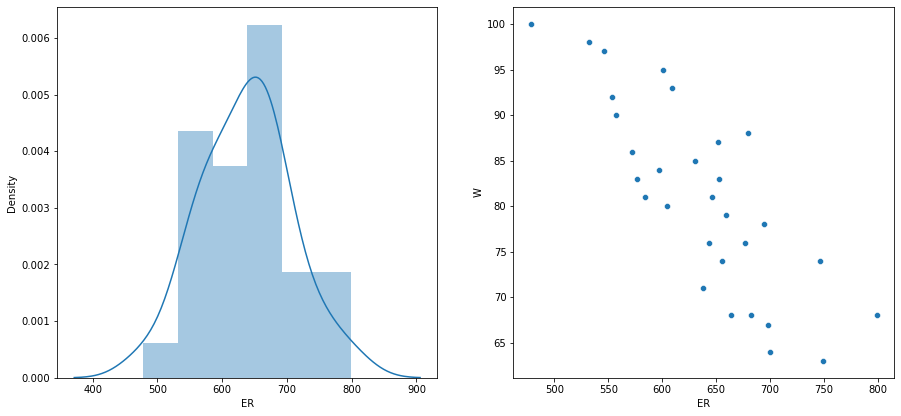

In [28]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['ER'])
plt.xlabel('ER')
plt.subplot(222)
sns.scatterplot(x= 'ER', y= 'W', data= ball)
plt.xlabel('ER')
plt.ylabel('W')
plt.show()

By looking at both the graphs of ER we can conclude that data is showing somewhat slight hint of positive skewness with data having highest density at around 670 from the distplot and from the scatterplot we can conclude that data is having negative correlation with target feature while not being scattered so much all over the place.

12. ERA (Earned Run Average)

In [29]:
ball['ERA'].unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

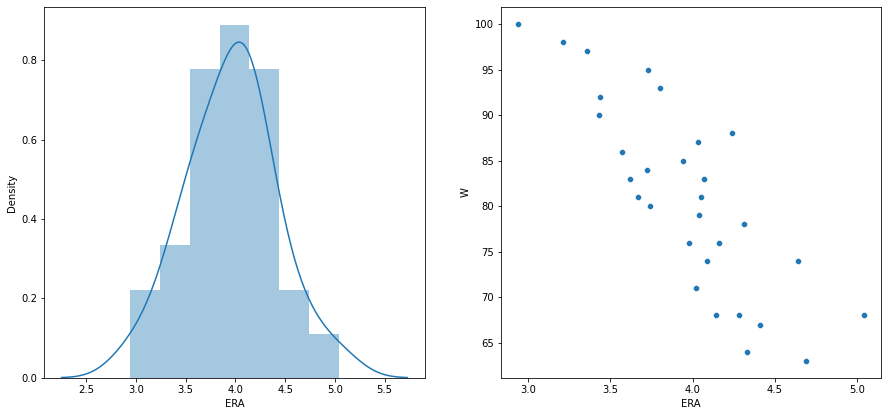

In [30]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['ERA'])
plt.xlabel('ERA')
plt.subplot(222)
sns.scatterplot(x= 'ERA', y= 'W', data= ball)
plt.xlabel('ERA')
plt.ylabel('W')
plt.show()

By looking at both the graphs of ERA we can conclude that we cannot determine the skewness of the data as it is almost giving the normalize vibe from it and data having highest density around 4.0 from the distplot and from the scatterplot we can conclude that data is having negative correlation with target feature while data being scattered not so much.

13. CG (Complete Games)

In [31]:
ball['CG'].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

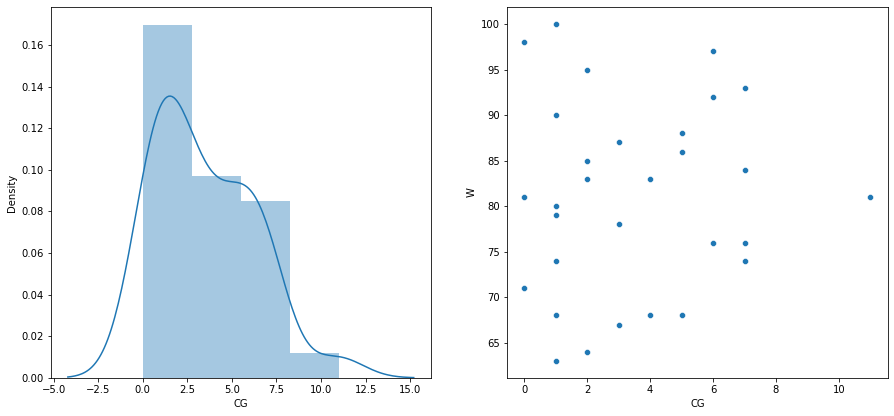

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['CG'])
plt.xlabel('CG')
plt.subplot(222)
sns.scatterplot(x= 'CG', y= 'W', data= ball)
plt.xlabel('CG')
plt.ylabel('W')
plt.show()

By looking at both the graphs of CG we can conclude that data is showing positive skewness with having the highest density between 0.0 and 2.5 from the distplot and from the scatterplot we can conclude that data is in somewhat positive correlation with target feature while being scattered with increasing values.

14. SHO (Shutouts)

In [33]:
ball['SHO'].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

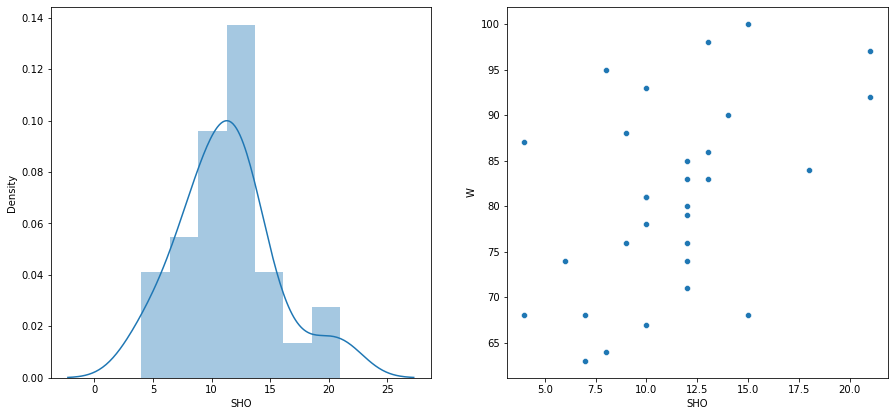

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['SHO'])
plt.xlabel('SHO')
plt.subplot(222)
sns.scatterplot(x= 'SHO', y= 'W', data= ball)
plt.xlabel('SHO')
plt.ylabel('W')
plt.show()

By looking at both the graphs of SHO we can conclude that data is showing positive skewness with having highest density around 13 from distplot and from scatterplot we can conclude that data is having positive correlation with target feature while data being somewhat scattered with increase in value.

15. SV (Saves)

In [35]:
ball['SV'].unique()

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

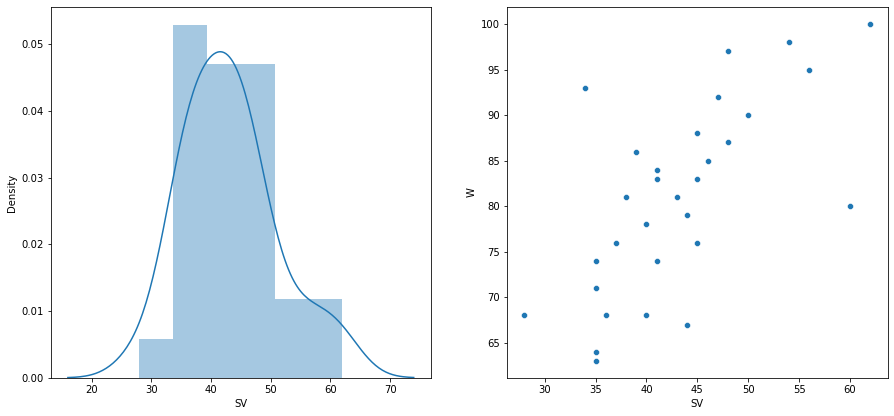

In [36]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['SV'])
plt.xlabel('SV')
plt.subplot(222)
sns.scatterplot(x= 'SV', y= 'W', data= ball)
plt.xlabel('SV')
plt.ylabel('W')
plt.show()

By looking at both the graphs of SV we can conclude that data is showing positive skewness with having the highest density at around 36 from distplot and from the scatterplot we can conclude that data is having positive correlation with target feature while data being somewhat scattered with increase in its values.

16. E (Errors)

In [37]:
ball['E'].unique()

array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

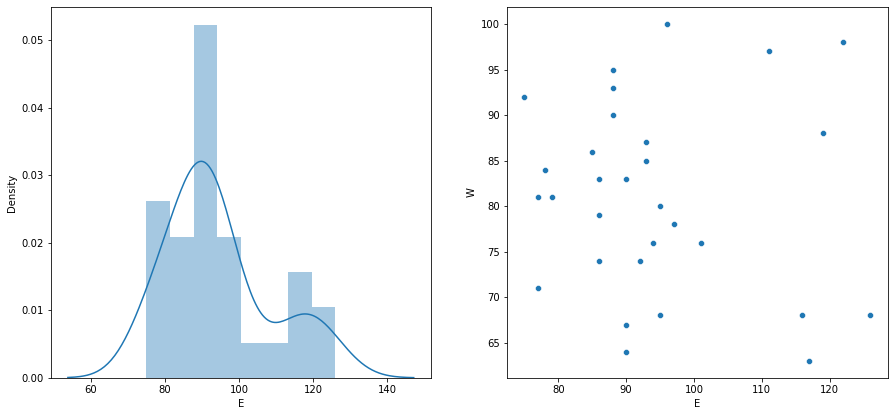

In [38]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ball['E'])
plt.xlabel('E')
plt.subplot(222)
sns.scatterplot(x= 'E', y= 'W', data= ball)
plt.xlabel('E')
plt.ylabel('W')
plt.show()

By looking at both the graphs of E we can conclude that data is showing positive skewness with having highest density at around 90 and plot line is showing two peaks from the distplot and from the scatterplot we can conclude that it is difficult to determine the data's correlation with target feature as it has been scattered all over the place.

#### Now plotting heatmap to check for multicollinearity.

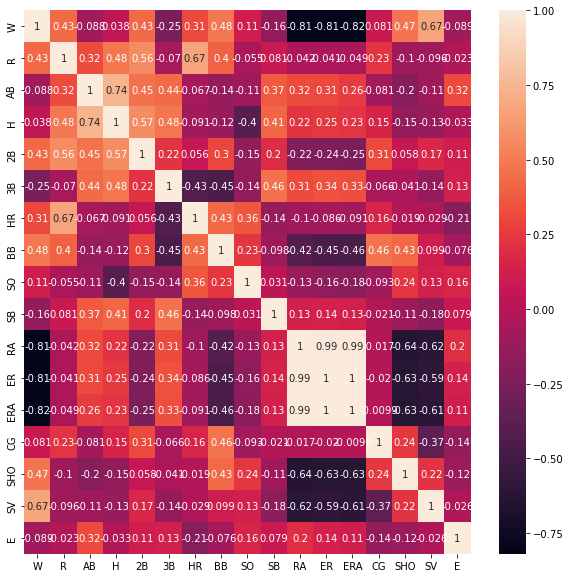

In [39]:
plt.figure(figsize= [10,10])
sns.heatmap(ball.corr(), annot= True)
plt.show()

As we can see that target feature (W) is having high positive correaltion with SV, SHO, SB, SO, BB, HR, 3B, 2B and R variable features and it is also having high negative correlation with ERA, ER and RA variable features.

Now we need to remove multicollinearity so that data can become much more refined.

In [40]:
ball.drop(['AB','H','CG','E'], axis= 1, inplace= True)

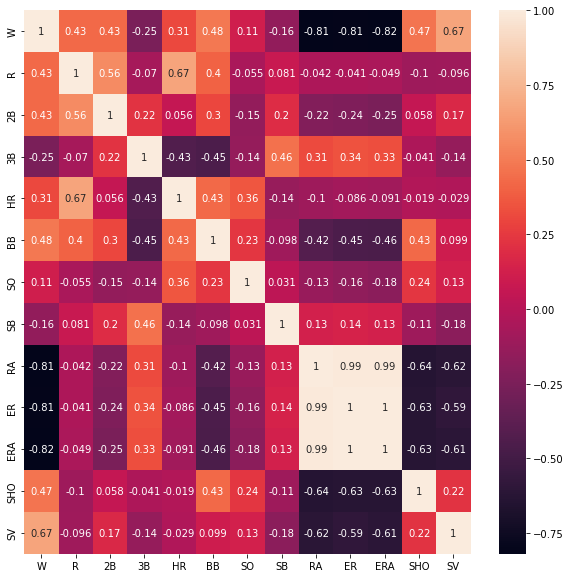

In [41]:
plt.figure(figsize= [10,10])
sns.heatmap(ball.corr(), annot= True)
plt.show()

Now the data has become much refined than previously. 

#### Now we need to check for the outliers and to judge whether it requires scaling or not to remove outliers.

In [42]:
q1, q2, q3 = ball['R'].quantile([0.25, 0.50, 0.75])

In [43]:
q1

651.25

In [44]:
q2

689.0

In [45]:
q3

718.25

In [46]:
iqr = q3 - q1
iqr

67.0

In [47]:
ul = q3 + (1.5*iqr)
ul

818.75

In [48]:
ll = q1 - (1.5*iqr)
ll

550.75

In [49]:
ball[ball['R']> ul]

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
5,93,891,308,17,232,570,1151,88,670,609,3.8,10,34


In [50]:
ball[ball['R']< ll]

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV


#### So, there is an outlier present in the dataset.

#### Now we have to split the data into test and train set and GridSearchCV needs to be applied to find the best suited model for this dataset.

In [51]:
X = ball.drop(['W'], axis= 1)
y = ball['W']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

1. Linear Regression model

In [53]:
lr = LinearRegression()

In [54]:
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [55]:
lrf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [56]:
lrf.best_params_

{'n_jobs': 1}

In [57]:
lrf.score(X_train, y_train)

0.9606435894045987

2. Decision Tree Regression model

In [58]:
dt = DecisionTreeRegressor()

In [59]:
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [60]:
dtf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [61]:
dtf.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [62]:
dtf.score(X_train, y_train)

0.7297313939854215

3. Random Forest Regression Model

In [63]:
rf = RandomForestRegressor()

In [64]:
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'n_estimators': [100,110,120,130,140]},
                  scoring= 'r2', cv= 5)

In [65]:
rff.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 110, 120, 130, 140]},
             scoring='r2')

In [66]:
rff.best_params_

{'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 100}

In [67]:
rff.score(X_train, y_train)

0.6984686561714158

4. Bagging Regression model

In [68]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth= 4, min_samples_leaf= 4, min_samples_split= 3))

In [69]:
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [70]:
brf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4,
                                                                             min_samples_leaf=4,
                                                                             min_samples_split=3)),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [71]:
brf.best_params_

{'max_features': 3, 'max_samples': 1, 'n_estimators': 20}

In [72]:
brf.score(X_train, y_train)

-0.14612403240000682

5. SVR model

In [73]:
sv = SVR()

In [74]:
svf = GridSearchCV(sv, param_grid= {'kernel': ['rbf','linear'], 'C': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [75]:
svf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['rbf', 'linear']},
             scoring='r2')

In [76]:
svf.best_params_

{'C': 5, 'kernel': 'linear'}

In [77]:
svf.score(X_train, y_train)

0.8724127705012057

By looking at performance of all the models we can conclude that the best suited model for this dataset is Linear Regression model.

#### Now applying the selected model on the data

In [78]:
lr = LinearRegression(n_jobs= 1)

In [79]:
pred = lr.fit(X_train, y_train).predict(X_test)

In [80]:
prediction = pd.DataFrame({'Actual': y_test, 'Predictions': (np.round(pred, 0))})

In [81]:
prediction

,Actual,Predictions
17,97,87.0
21,83,82.0
10,88,79.0
19,64,67.0
14,68,82.0
20,90,91.0


#### Checking the performance of model using various metrics

In [82]:
print('r2 score : ', metrics.r2_score(y_test, pred))

r2 score :  0.5374825146530366


In [83]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

rmse score :  8.072395840282896


In [84]:
print('mae score : ', metrics.mean_absolute_error(y_test, pred))

mae score :  6.224176231241612


As model is showing high r2_score for train dataset and very much low dataset for test dataset. So we can conclude that the model is overfit. Now we need to check the model after scaling the data.

In [85]:
scaler = StandardScaler()

In [86]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [87]:
pr = lr.fit(scaledX_train, y_train).predict(scaledX_test)

Now checking the metrics for scaled data using the above model.

In [88]:
print('r2_score : ', metrics.r2_score(y_test, pr))

r2_score :  0.5374825146530345


In [89]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pr)))

rmse score :  8.072395840282915


In [90]:
print('mae score : ', metrics.mean_absolute_error(y_test, pr))

mae score :  6.224176231241621


So scaling the data doesn't help in improving metircs of the data using the Linear Regrssion model and the conclusion is unchanged which means model is still an overfit on the data set. So now we need to check the another which has the second highest r2_score in GridSearchCV which is SVR.

In [91]:
sv = SVR(kernel= 'linear', C= 5)

In [92]:
pre = sv.fit(X_train, y_train).predict(X_test)

Now checking the metrics of this model

In [93]:
print('r2_score : ', metrics.r2_score(y_test, pre))

r2_score :  0.8721078437594896


In [94]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pre)))

rmse score :  4.244830242816512


In [95]:
print('mae score : ', metrics.mean_absolute_error(y_test, pre))

mae score :  3.839751672310134


In [97]:
predicting = pd.DataFrame({'Actual': y_test, 'Predictions': np.round(pre, 0)})
predicting

,Actual,Predictions
17,97,92.0
21,83,86.0
10,88,83.0
19,64,64.0
14,68,72.0
20,90,96.0


By checking the metrics of SVR model on the dataset it is giving the almost same r2_score for test dataset as it was giving for train dataset in GridSearchCV and also it root mean squared error value and mean absolute error value is very much less as compared to Linear Regression model. So we can conclude that SVR is best suited model for this dataset.

#### Now we need to save the model for further use.

In [98]:
import pickle

In [99]:
save_sv = pickle.dumps(sv)

#### Hence we have done the prediction on the dataset using best suited model. So, we have achieved our objective.